In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv('npf_train.csv')

class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

not_needed_columns = ["partlybad", "id", "date"]
df = df.drop(not_needed_columns, axis=1)

In [214]:
class2_categories = {
    "nonevent": 0,
    "event": 1
}

class4_categories = {
    "nonevent": 0,
    "Ia": 1,
    "Ib": 2,
    "II": 3
}

def categorize_class2(row):
    row["class2"] = class2_categories[row["class2"]]
    
    return row
def categorize_class4(row):
    row["class4"] = class4_categories[row["class4"]]
    
    return row

df = df.apply(lambda row: categorize_class2(row), axis=1)
df = df.apply(lambda row: categorize_class4(row), axis=1)
df["class2"] = df["class2"].astype("category")
df["class4"] = df["class4"].astype("category")

df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.describe()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,...,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,380.996307,3.509202,381.014152,3.295570,381.906526,4.290148,380.913345,3.094905,193.287920,145.571635,...,6.311782,1.652786,6.898868,1.987094,10.961236,7.845917,0.451261,0.391348,0.003050,0.000659
std,10.897068,3.433711,10.878318,3.192464,10.482752,4.290241,10.900973,2.918037,126.058537,94.362871,...,9.680534,0.972092,9.744430,1.172087,6.633754,5.042478,0.319151,0.289645,0.002257,0.000572
min,356.526871,0.053968,356.796486,0.048990,359.795102,0.152663,356.841429,0.037417,3.719434,1.997962,...,-23.288234,0.066700,-22.659083,0.069879,0.295780,0.174813,0.005346,0.003261,0.000227,0.000027
25%,373.001701,1.085523,373.016258,1.016582,374.129292,1.222415,372.921420,1.004862,71.773357,54.867997,...,-1.298557,0.833480,-0.661579,0.888506,4.937496,2.890366,0.137491,0.103036,0.001500,0.000275
50%,380.102616,2.384334,380.101303,2.246497,380.973091,2.714247,380.113959,2.137779,197.939217,156.529795,...,7.320084,1.696258,7.917160,2.027125,11.702413,8.390743,0.438305,0.391399,0.002475,0.000491
75%,388.480984,4.956735,388.505367,4.645716,389.003091,6.286882,388.296775,4.376801,304.162015,230.776779,...,13.964999,2.359977,14.549644,2.878753,16.727710,12.289556,0.700794,0.623115,0.004176,0.000829
max,411.345970,20.960630,411.360294,19.351218,411.014925,27.656008,411.348676,17.384845,449.450545,309.124047,...,25.684185,5.124718,25.897075,5.422549,22.560576,16.692785,1.242857,1.074115,0.019094,0.003658


# Models

## Imports

In [215]:
# imports
# feature selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC

# models
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# scoring
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## List of models

In [216]:
models = []

# SVCs with varying C
model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'rbf', 
        "C":1, 
        "random_state":0
    }
}

models.append(model1)

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'rbf', 
        "C":10, 
        "random_state":0
    }
}

models.append(model1)

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'rbf', 
        "C":20, 
        "random_state":0
    }
}

models.append(model1)


model2 = {
    "model": LogisticRegression(),
    "params": {
        "random_state":0,
        "solver": 'lbfgs'
    }
}

models.append(model2)

model3 = {
    "model": DecisionTreeClassifier(),
    "params": {
        "random_state":0
    }
}

models.append(model3)

model4 = {
    "model": RandomForestClassifier(),
    "params": {
        "random_state":0
    }
}
models.append(model4)

model5 = {
    "model": KNeighborsClassifier(),
    "params": {
        "n_neighbors":10
    }
}
models.append(model5)

model6 = {
    "model": GaussianNB(),
    "params": {
    }
}
models.append(model6)

# Feature selection

## Evaluating feature estimators

C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nicot\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

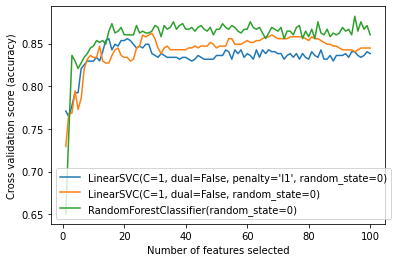

In [210]:
min_features_to_select = 1

# Data with scaling
X = df.drop(["class4", "class2"], axis=1)
y = df["class2"]
scaler = StandardScaler()
fit_sc = scaler.fit(X,y)
X = scaler.fit_transform(X)

estimators=[LinearSVC(penalty="l1", C=1, dual=False, random_state=0), LinearSVC(penalty="l2", C=1, dual=False, random_state=0), RandomForestClassifier(random_state=0)]

# Figure init.
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")

# Test estimators
for i, estimator in enumerate(estimators):
    rfecv = RFECV(estimator=estimator, step=1, cv = StratifiedKFold(10), scoring="accuracy", min_features_to_select=min_features_to_select )
    rfecv.fit(X,y)

    # Plot number of features VS. cross-validation scores
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_, label=str(estimator)
    )

plt.legend()
plt.show()

# Test some models

In [218]:
# Variables for results
initial_result = {}
result_df = pd.DataFrame(data=initial_result)

# Parameters
y_col = "class2"
cv_features = StratifiedKFold(2)
cv = 2
step_features = 2

# Data
X_cols = list(filter(lambda col: col != y_col and col != "class4", df.columns))
X_train = df[X_cols]
y_train = df[y_col]

# Tests
for model in models:
    clf = model["model"]
    params = model["params"]
    clf.set_params(**params)

    pipe = Pipeline(
        [('scaler', StandardScaler()), 
        #("variance", VarianceThreshold(threshold=(.8 * (1 - .8)))), 
        ("feature_selection", RFECV(estimator=RandomForestClassifier(random_state=0), step=step_features, cv=cv_features, scoring="accuracy")), 
        ("clf", clf)]
    )

    scores = cross_val_score(pipe, X_train, y_train, cv=cv)
    cv_score = scores.mean()

    pipe.fit(X_train, y_train)
    
    new_result_row = { 
        "model": type(clf).__name__, 
        "model_params": params,
        "dataset_columns": list(X_train.columns[pipe.steps[1][1].support_]), 
        "dataset_columns_length": pipe.steps[1][1].transform(X_train).shape[1],
        "cv_acc": cv_score
    }
    result_df = result_df.append(new_result_row, ignore_index=True)

In [219]:
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params
5,0.855895,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,RandomForestClassifier,{'random_state': 0}
3,0.851528,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}"
0,0.847162,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}"
2,0.827511,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}"
1,0.825328,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}"
6,0.823144,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,KNeighborsClassifier,{'n_neighbors': 10}
7,0.816594,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,GaussianNB,{}
4,0.786026,"[CO2168.std, CO2336.mean, CO2336.std, CO242.me...",74.0,DecisionTreeClassifier,{'random_state': 0}


In [184]:
# 10-fold, class2, Rforest
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params
5,0.873382,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,RandomForestClassifier,{'random_state': 0}
2,0.869034,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}"
6,0.862464,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,KNeighborsClassifier,{'n_neighbors': 10}
0,0.860193,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}"
1,0.855845,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}"
3,0.855845,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}"
7,0.814541,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,GaussianNB,{}
4,0.781643,"[CO2168.std, CO2336.std, CO2504.mean, Glob.mea...",48.0,DecisionTreeClassifier,{'random_state': 0}


In [182]:
# 10-fold, class2, SVC
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
2,0.861789,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.847826
6,0.856969,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,KNeighborsClassifier,{'n_neighbors': 10},0.869565
3,0.854355,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.760870
1,0.854297,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.782609
5,0.852033,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,RandomForestClassifier,{'random_state': 0},0.869565
0,0.849419,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.804348
7,0.774564,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,GaussianNB,{},0.782609
4,0.771951,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,DecisionTreeClassifier,{'random_state': 0},0.826087


In [176]:
# 2-fold, class2, SVC
result_df.sort_values(by='test_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
0,0.866505,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.869565
2,0.827670,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.847826
6,0.827670,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,KNeighborsClassifier,{'n_neighbors': 10},0.847826
7,0.774272,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,GaussianNB,{},0.847826
1,0.861650,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.826087
5,0.859223,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,RandomForestClassifier,{'random_state': 0},0.826087
3,0.851942,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.782609
4,0.810680,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,DecisionTreeClassifier,{'random_state': 0},0.782609


In [177]:
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
0,0.866505,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.869565
1,0.861650,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.826087
5,0.859223,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,RandomForestClassifier,{'random_state': 0},0.826087
3,0.851942,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.782609
2,0.827670,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.847826
6,0.827670,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,KNeighborsClassifier,{'n_neighbors': 10},0.847826
4,0.810680,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,DecisionTreeClassifier,{'random_state': 0},0.782609
7,0.774272,"[CO2336.std, CO2504.mean, H2O336.mean, H2O336....",28.0,GaussianNB,{},0.847826


In [179]:
# 10-fold features, 2-fold test, class2, SVC
result_df.sort_values(by='test_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
5,0.854369,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,RandomForestClassifier,{'random_state': 0},0.869565
6,0.822816,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,KNeighborsClassifier,{'n_neighbors': 10},0.869565
2,0.837379,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.847826
4,0.808252,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,DecisionTreeClassifier,{'random_state': 0},0.826087
0,0.861650,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.804348
1,0.856796,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.782609
7,0.759709,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,GaussianNB,{},0.782609
3,0.842233,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.760870


In [180]:
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
0,0.861650,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.804348
1,0.856796,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.782609
5,0.854369,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,RandomForestClassifier,{'random_state': 0},0.869565
3,0.842233,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.760870
2,0.837379,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.847826
6,0.822816,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,KNeighborsClassifier,{'n_neighbors': 10},0.869565
4,0.808252,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,DecisionTreeClassifier,{'random_state': 0},0.826087
7,0.759709,"[CO2336.std, CO242.mean, CO242.std, CO2504.mea...",80.0,GaussianNB,{},0.782609


In [167]:
# 2-fold, class2, Rforest
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
3,0.861650,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.760870
5,0.861650,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,RandomForestClassifier,{'random_state': 0},0.869565
2,0.856796,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.869565
6,0.851942,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,KNeighborsClassifier,{'n_neighbors': 10},0.869565
0,0.849515,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.804348
1,0.839806,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.826087
7,0.822816,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,GaussianNB,{},0.804348
4,0.781553,"[CO2168.std, CO2336.mean, CO242.std, CO2504.me...",56.0,DecisionTreeClassifier,{'random_state': 0},0.804348


In [170]:
# 2-fold, class4, Rforest
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
2,0.754854,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,SVC,"{'kernel': 'rbf', 'C': 1, 'random_state': 0}",0.673913
3,0.750000,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.673913
6,0.742718,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,KNeighborsClassifier,{'n_neighbors': 10},0.804348
0,0.735437,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,SVC,"{'kernel': 'rbf', 'C': 10, 'random_state': 0}",0.760870
1,0.720874,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,SVC,"{'kernel': 'rbf', 'C': 20, 'random_state': 0}",0.782609
7,0.713592,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,GaussianNB,{},0.673913
5,0.703883,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,RandomForestClassifier,{'random_state': 0},0.782609
4,0.701456,"[CO2336.mean, Glob.mean, H2O168.mean, H2O336.m...",25.0,DecisionTreeClassifier,{'random_state': 0},0.826087
